## 🔬 FDA Food Safety Enforcement Audit (2008-2022)  
**Author:** Md Shafin Ahamed    
**Domain:** Food Technology | Food Safety Risk Assessment    
**Tools:** Python, Pandas, Seaborn, NLP    

---

### 📋 Executive Summary    
This project performs a programmatic audit of FDA Food Enforcement records. Unlike manual review methods, this analysis utilizes **Natural Language Processing (NLP)** to categorize unstructured recall data and identify systemic failures in the supply chain.

**Key Objectives:**     
1.  **Categorize** around 6,500 unique recall reasons into standardized risk groups.    
2.  **Identify** high-risk product categories (e.g., Dairy, Produce) by classifying unstructured product descriptions.  
3.  **Analyze** temporal trends to visualize the impact of global events (e.g., COVID-19).    
4.  **Locate** geographic hotspots for food safety violations.  

In [2]:
#Importing Tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Inserting the FILE into the code
file_path = r"D:\DataFiles\FDA Food Data\data\food_enforcement.csv"
#Reading File, type=CSV and Encoding ='ISO-8859-1'
df= pd.read_csv(file_path, encoding='ISO-8859-1')

### 1. The "What": Identifying Critical Risk Factors (NLP)  
**Challenge:** The raw FDA data contains around 6,500 unique, unstructured text descriptions for recalls (e.g., "found listeria in tub," "listeria detected").  
**Solution:** I developed a keyword-based categorization algorithm to group these into standardized risk classes (e.g., **"Listeria"**, **"Undeclared Allergen"**).  
**Hypothesis:** While biological pathogens are dangerous, labeling errors (Allergens) may be more frequent due to documentation failures.

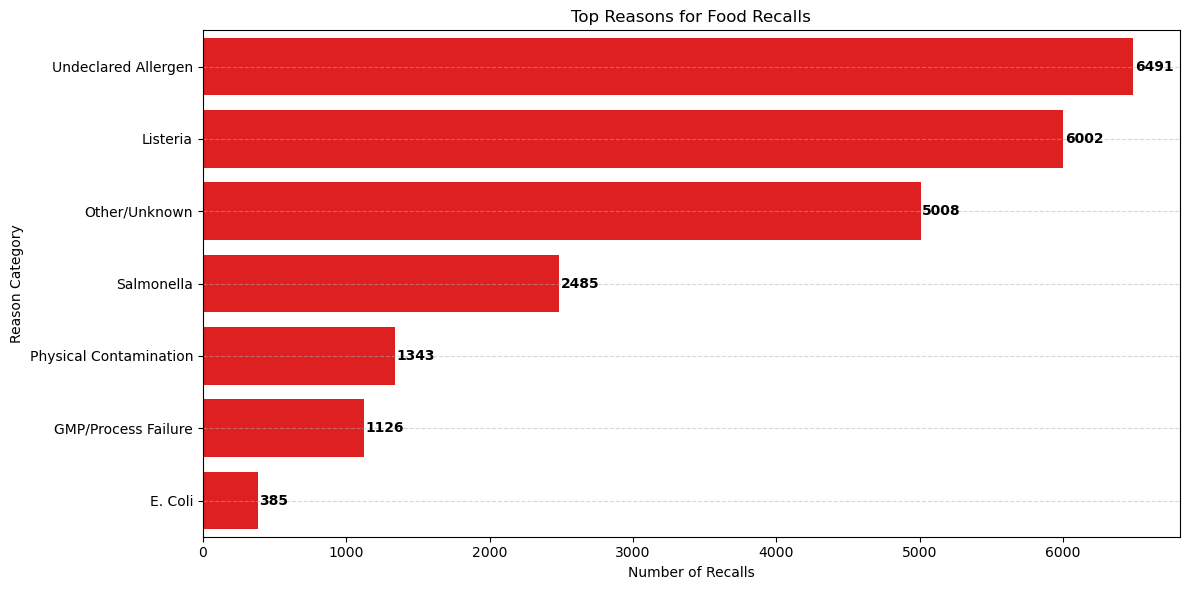

In [62]:
#Data cleaning , NPL & Visualization
def categorize_reason(text):
    text = str(text).lower()
    
    # The Logic Rules (The "Sensors")
    if 'listeria' in text:
        return 'Listeria'
    elif 'salmonella' in text:
        return 'Salmonella'
    elif 'e. coli' in text:
        return 'E. Coli'
    # Grouping all allergy issues together
    elif 'undeclared' in text or 'allergen' in text or 'milk' in text or 'peanut' in text or 'soy' in text:
        return 'Undeclared Allergen'
    # Grouping manufacturing failures
    elif 'gmp' in text or 'manufacturing' in text or 'process' in text:
        return 'GMP/Process Failure'
    # Grouping physical hazards
    elif 'plastic' in text or 'glass' in text or 'metal' in text:
        return 'Physical Contamination'
    else:
        return 'Other/Unknown'

# Create a NEW column called 'short_reason'
df['short_reason'] = df['reason_for_recall'].apply(categorize_reason)

#step 3 : Visualization
#Give a size 
plt.figure(figsize=(12,6))
#countplot for automatic plot
ax= sns.countplot( data= df,
              y= 'short_reason',
              order= df['short_reason'].value_counts().index, color='red')
# Loop through the bars and add the numbers
for container in ax.containers:
    ax.bar_label(
        container,
        padding=1,
        weight= 'bold'
                )

#the frame work
plt.title('Top Reasons for Food Recalls')
plt.xlabel('Number of Recalls')
plt.ylabel('Reason Category')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("fda_recall_graph.png") #to save the graph as PNG
#display
plt.show()

### 2. The "What": Product Vulnerability Analysis
**Objective:** To programmatically classify over 22,000 unstructured product descriptions into standardized categories (e.g., "Dairy", "Produce", "Meat") to identify the specific food groups most prone to recalls.

**Insight:**
* **High Risk:** **Dairy/Ice Cream** (#1) and **Produce** (#2) are the primary drivers of recalls, highlighting specific vulnerabilities to *Listeria* (cold chain) and *E. Coli* (raw agricultural products).
* **Counter-Intuitive Finding:** **Meat & Poultry** recalls are comparatively low, challenging consumer perceptions about raw meat safety and highlighting the effectiveness of USDA kill-steps (cooking).

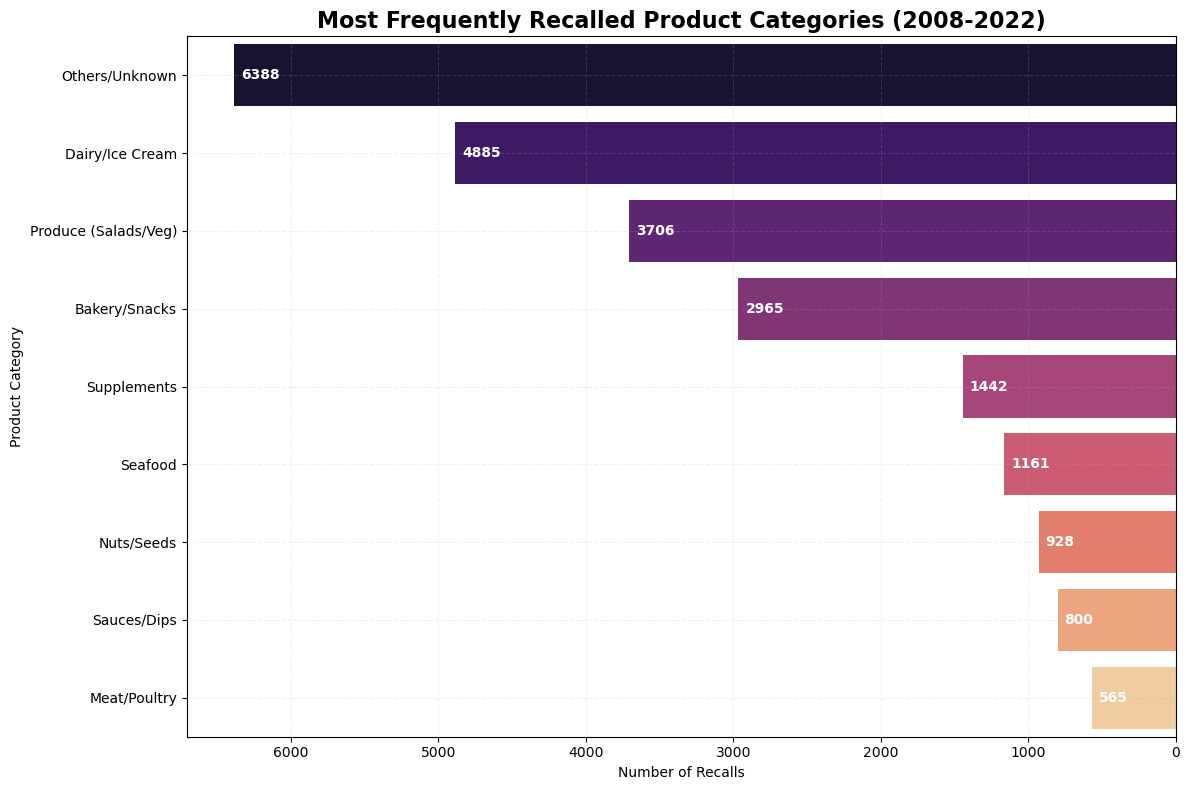

In [52]:
#Product Categorization
#crating keywords (values) for a Clean Category (key)
product_map = {
    'Produce (Salads/Veg)': ['salad', 'lettuce', 'spinach', 'romaine', 'cabbage', 'kale', 'vegetable', 'onion', 'fruit', 'melon', 'cantaloupe', 'sprout', 'cut'],
    'Dairy/Ice Cream': ['ice cream', 'cheese', 'yogurt', 'milk', 'butter', 'cream', 'dairy', 'custard'],
    'Seafood': ['fish', 'salmon', 'tuna', 'shrimp', 'crab', 'lobster', 'oyster', 'seafood', 'herring', 'caviar'],
    'Bakery/Snacks': ['cake', 'cookie', 'bread', 'muffin', 'brownie', 'dough', 'chocolate', 'candy', 'snack', 'chip', 'popcorn'],
    'Supplements': ['supplement', 'vitamin', 'capsule', 'tablet', 'powder', 'protein'],
    'Meat/Poultry': ['chicken', 'beef', 'pork', 'sausage', 'ham', 'meat', 'turkey', 'frankfurter'],
    'Nuts/Seeds': ['peanut', 'almond', 'cashew', 'pecan', 'walnut', 'seed', 'nut', 'pistachio'],
    'Sauces/Dips': ['dip', 'sauce', 'salsa', 'hummus', 'dressing', 'spread', 'condiment']
}
#classify
def get_product_category(description):
    if not isinstance(description, str): #empty row handling
        return 'Others/Unknown'
    description = description.lower()
    for category, keywords in product_map.items():
        for word in keywords:
            if word in description:
                return category
    return 'Others/Unknown'

df['product_category'] = df['product_description'].apply(get_product_category)
#count new categories
cat_counts = df['product_category'].value_counts()
#visualization
plt.figure(figsize=(12,8))
#plot
ax = sns.barplot(
    x= cat_counts.values,
    y= cat_counts.index,
    hue= cat_counts.index,
    legend= False,
    palette='magma' 
)

#Adding lable
for container in ax.containers:
    ax.bar_label(
        container,
        padding=3,
        weight= 'bold',
        color= 'white'
    )
#inverting the graph 
plt.gca().invert_xaxis()

plt.title('Most Frequently Recalled Product Categories (2008-2022)', fontsize=16, weight='bold')
plt.xlabel('Number of Recalls')
plt.ylabel('Product Category')
plt.grid(axis='both', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.savefig('product_category_analysis.png')
plt.show()


### 3. The "When": Temporal Trend Analysis (2012-2022)  
**Objective:** To analyze the frequency of recall events over the last decade and identify anomalies linked to external global events.  

**Insight:**  
* **The "COVID Gap":** Recall events dropped sharply in **2020 (1,117 events)** compared to the 2016 peak (3,066 events). This correlates with the suspension of routine on-site FDA inspections during the pandemic, representing a potential "blind spot" in enforcement rather than improved compliance.  
* **The Rebound:** 2021 shows a clear upward trend (1,489 events) as regulatory activities resumed.   
* **Data Note:** The low figure for 2022 represents only a half-year report and should not be interpreted as a full-year decline.   

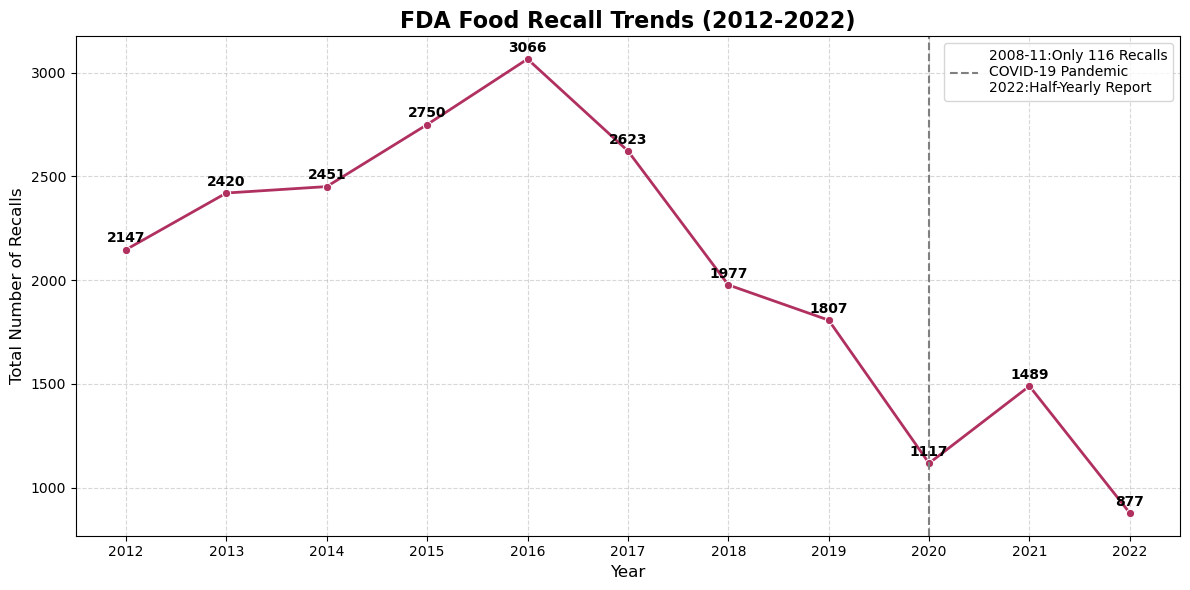

In [48]:
#Time trend 

#1.Converting date column into time
df['recall_initiation_date'] = pd.to_datetime(
    df['recall_initiation_date'], errors='coerce')

#2.creating a new column, Year
df['year'] = df['recall_initiation_date'].dt.year

#3.Filter for Reliable Data (2012-2022)
df_trend = df[(df['year']>=2012 )& (df['year']<= 2022)]

#4.Count Recalls per Year
yearly_counts = df_trend['year'].value_counts().sort_index()

#5.Visualization
plt.figure(figsize=(12, 6))

#'marker=o' puts a dot on each year so you can see the data point clearly
ax = sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o', linewidth=2, color='#b03060') 

#X: ADDING NUMBERS TO DOTS ---
# We loop through every Year (x) and Count (y) pair
for x, y in zip(yearly_counts.index, yearly_counts.values):
    # y + 20 pushes the text up slightly so it doesn't cover the dot
    ax.text(x, y + 20, f'{y}', ha='center', va='bottom', fontsize=10, weight='bold')

#the start of COVID-19 
plt.axvline(x=2020, color='gray', linestyle='--' , label='2008-11:Only 116 Recalls''\nCOVID-19 Pandemic''\n2022:Half-Yearly Report')

# Professional Labels
plt.title('FDA Food Recall Trends (2012-2022)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Recalls', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(yearly_counts.index)

#Save and Show
plt.tight_layout()
plt.savefig('recall_trend_line.png')
plt.show()

### 4. The "Where": Geographic Supply Chain Hotspots  
**Objective:** To identify which regions contribute most significantly to recall events.  
**Insight:** This analysis highlights key manufacturing hubs (e.g., California) and reveals cross-border enforcement involving Canadian provinces (Ontario, Quebec).

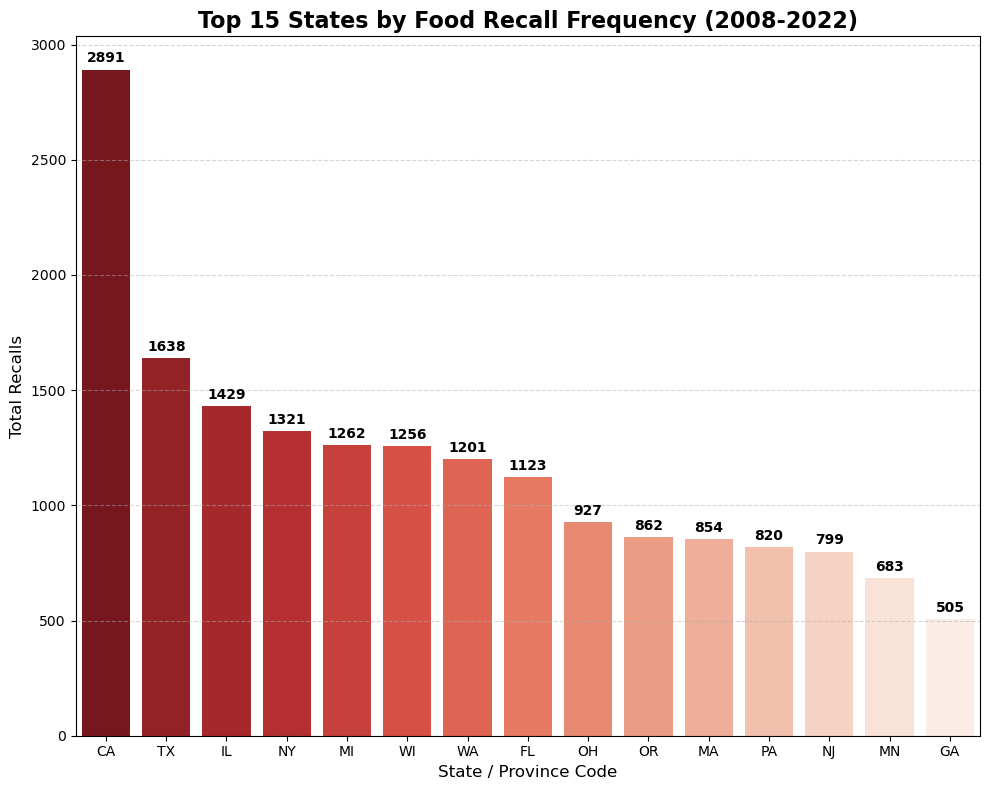

In [53]:
#Geographc Analysis: Top 15 Locations
#1.cleaing data
df_geo = df.dropna(subset=['state'])
#2.Count Recalls per State
state_count = df_geo['state'].value_counts().head(15)
#3.Plot the chart
plt.figure(figsize=(10,8)) #size
#chart
ax= sns.barplot(
    x= state_count.index ,
    y= state_count.values,
    hue= state_count.index,
    legend=False ,
    palette= "Reds_r"
)
#adding number 
for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize= 10, weight='bold')
#format
plt.title('Top 15 States by Food Recall Frequency (2008-2022)', fontsize=16, weight='bold')
plt.xlabel('State / Province Code', fontsize=12)
plt.ylabel('Total Recalls', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
# Save
plt.tight_layout()
plt.savefig('geo_analysis_states.png')
plt.show()